In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
url = "https://raw.githubusercontent.com/cgveradi/house_martell_project/main/data/clean/df_clean.csv"
df = pd.read_csv(url)

In [4]:
df

,client_id,visitor_id,visit_id,process_step,date_time,Variation,tenure_yrs,clnt_tenure_mnth,age,gender,num_accts,bal,calls_6_mnth,logons_6_mnth
0,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
1,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
2,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
3,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
4,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317230,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0
317231,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0
317232,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0
317233,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0


In [17]:
# Summary statistics for the primary demographic columns

demo_summary = df[['age', 'tenure_yrs', 'bal']].describe()
print("High-Level Client Profile:")
print(demo_summary)

# Check the gender distribution (using the mapping we did earlier)

print("\n----------")
print("\nGender Distribution:")
print(df['gender'].value_counts())

High-Level Client Profile:
                 age     tenure_yrs           bal
count  317123.000000  317135.000000  3.171350e+05
mean       48.528303      12.175562  1.607980e+05
std        15.636554       6.958357  3.408625e+05
min        17.000000       2.000000  2.378944e+04
25%        34.500000       6.000000  4.103359e+04
50%        50.000000      11.000000  6.909005e+04
75%        61.000000      16.000000  1.511617e+05
max        96.000000      55.000000  1.632004e+07

----------

Gender Distribution:
gender
Unknown    107614
Male       106703
Female     102810
Other           8
Name: count, dtype: int64


In [19]:
# Age Bins
df['age_group'] = pd.cut(df['age'], 
                              bins=[0, 35, 60, 100], 
                              labels=['Young (<35)', 'Middle (35-60)', 'Senior (>60)'])

# Tenure Bins
df['tenure_group'] = pd.cut(df['tenure_yrs'], 
                                 bins=[0, 5, 15, 100], 
                                 labels=['New (<5yr)', 'Established (5-15yr)', 'Long-standing (>15yr)'])

# Compare digital behavior across age groups

print("\n----------")
age_behavior = df.groupby('age_group', observed=False)[['logons_6_mnth', 'calls_6_mnth']].mean()
print("\nBehavior by Age Group:")
print(age_behavior)


----------

Behavior by Age Group:
                logons_6_mnth  calls_6_mnth
age_group                                  
Young (<35)          6.215177      3.195345
Middle (35-60)       6.090321      3.057473
Senior (>60)         6.641408      3.575610


In [20]:
# 1. Identify which unique clients reached the 'confirm' step
confirmed_clients = df[df['process_step'] == 'confirm']['client_id'].unique()

# 2. Create a flag at the client level
df_unique = df.drop_duplicates(subset='client_id').copy()
df_unique['is_successful'] = df_unique['client_id'].isin(confirmed_clients)

# 3. Calculate Completion Rate by Age Group
completion_stats = df_unique.groupby('age_group', observed=False)['is_successful'].mean() * 100
print("\nCompletion Rate per Age Segment (%):")
print(completion_stats)


Completion Rate per Age Segment (%):
age_group
Young (<35)       69.158291
Middle (35-60)    68.168629
Senior (>60)      64.445368
Name: is_successful, dtype: float64



Correlation Matrix (Behavioral Insights):
               logons_6_mnth  calls_6_mnth       bal       age
logons_6_mnth       1.000000      0.994372  0.174472  0.084943
calls_6_mnth        0.994372      1.000000  0.167309  0.076143
bal                 0.174472      0.167309  1.000000  0.201108
age                 0.084943      0.076143  0.201108  1.000000


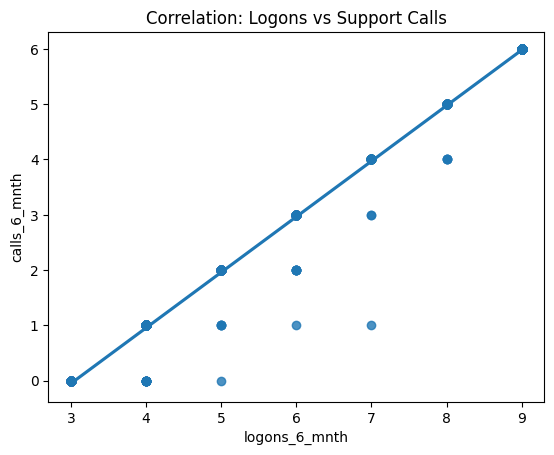

In [21]:
# Calculate correlation between digital activity and support needs
behavior_metrics = df[['logons_6_mnth', 'calls_6_mnth', 'bal', 'age']]
correlation_matrix = behavior_metrics.corr()

print("\nCorrelation Matrix (Behavioral Insights):")
print(correlation_matrix)

# Visualization of the relationship
sns.regplot(data=df_unique.sample(1000), x='logons_6_mnth', y='calls_6_mnth')
plt.title('Correlation: Logons vs Support Calls')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your cleaned data
df = pd.read_csv('../../data/clean/df_clean.csv')

# 2. Pre-processing for meaningful charts
# Identify unique clients and whether they reached the 'confirm' step
confirm_ids = df[df['process_step'] == 'confirm']['client_id'].unique()
df_unique = df.drop_duplicates(subset='client_id').copy()
df_unique['is_successful'] = df_unique['client_id'].isin(confirm_ids)

# Create Segments (Bins)
df_unique['age_group'] = pd.cut(df_unique['age'], bins=[0, 35, 60, 100], labels=['Young (<35)', 'Middle (35-60)', 'Senior (>60)'])
df_unique['wealth_tier'] = pd.qcut(df_unique['bal'], q=3, labels=['Bronze', 'Silver', 'Gold'])

# Set the visual style
sns.set_theme(style="whitegrid")

# --- CHART 1: Age Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(df_unique['age'], bins=30, kde=True, color='#4e79a7')
plt.title('Client Age Distribution', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.savefig('chart_age_dist.png')

# --- CHART 2: Test vs Control Split (Fairness Check) ---
plt.figure(figsize=(8, 6))
sns.countplot(x='Variation', data=df_unique, palette='viridis', order=['Control', 'Test'])
plt.title('A/B Test Group Distribution', fontsize=16)
plt.xlabel('Experimental Group')
plt.ylabel('Client Count')
plt.savefig('chart_variation_split.png')

# --- CHART 3: Balance Distribution (Wealth Profile) ---
plt.figure(figsize=(10, 6))
# Filter outliers > $400k for better visualization of the mass market
sns.histplot(df_unique[df_unique['bal'] < 400000]['bal'], bins=50, kde=True, color='#59a14f')
plt.title('Account Balance Distribution (Filtered < $400k)', fontsize=16)
plt.xlabel('Account Balance ($)')
plt.savefig('chart_balance_dist.png')

# --- CHART 4: Completion Rate by Age Group ---
plt.figure(figsize=(10, 6))
completion_by_age = df_unique.groupby('age_group', observed=False)['is_successful'].mean().reset_index()
completion_by_age['is_successful'] *= 100 # Convert to percentage
sns.barplot(x='age_group', y='is_successful', data=completion_by_age, palette='Blues_d')
plt.title('Completion Rate (%) by Age Segment', fontsize=16)
plt.ylabel('Success Rate (%)')
plt.ylim(0, 100)
plt.savefig('chart_completion_age.png')

# --- CHART 5: Correlation Heatmap (Behavioral Insights) ---
plt.figure(figsize=(10, 8))
corr = df_unique[['age', 'tenure_yrs', 'bal', 'calls_6_mnth', 'logons_6_mnth']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: Behavior vs Demographics', fontsize=16)
plt.savefig('chart_correlation_heatmap.png')

plt.show()